In [11]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install shap

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 40.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ---------------- ----------------------- 12.3/30.3 MB 59.1 MB/s eta 0:00:01
   ----------------- ---------------------- 13.6/30.3 MB 56.9 MB/s eta 0:00:01
   -------------------------------- ------- 24.4/30.3 MB 38.6 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 37.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       380
           1       0.89      0.88      0.89       190

    accuracy                           0.93       570
   macro avg       0.92      0.92      0.92       570
weighted avg       0.93      0.93      0.93       570

Confusion Matrix:
 [[360  20]
 [ 22 168]]
ROC AUC: 0.9756440443213297


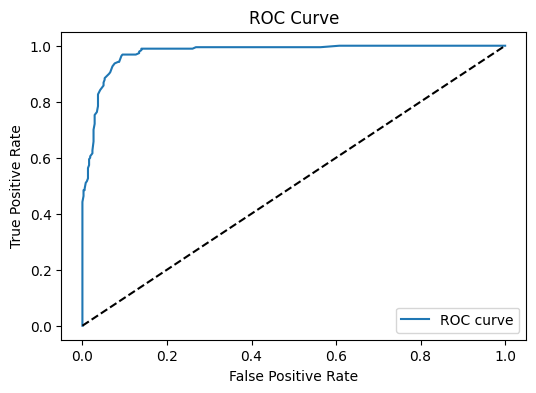

In [18]:
# 📦 MODEL TRAINING PIPELINE FOR GEOPHYSICAL FEATURES
# Author: Fermi
# Goal: From input features (gravity, magnetic, radiometric) to model evaluation

# === 1. Import libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import shap

# === 2. Load dataset ===
df = pd.read_csv("../data/processed/model_input_samples.csv")

# === 3. Select features and label ===
feature_cols = [
    'gravity_iso_residual', 'gravity_cscba', 'gravity_cscba_1vd',
    'mag_uc_1_2km', 'mag_uc_2_4km', 'mag_uc_4_8km', 'mag_uc_8_12km', 'mag_uc_12_16km',
    'radio_K_pct', 'radio_Th_ppm', 'radio_U_ppm',
    'radio_Th_K_ratio', 'radio_U_K_ratio', 'radio_U_Th_ratio'
]
X = df[feature_cols]
y = df['LABEL']

# === 4. Handle missing values ===
X = X.fillna(X.median())  # Simple imputation for now

# === 5. Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === 6. Feature scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 7. Train baseline model ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# === 8. Evaluate ===
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# === 9. ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# === END ===